# Project 2
## Introduce the problem
### What is the problem you are trying to solve?
##### Predicting `Titanic` survival
### What questions are you trying to find answers to?
##### What factors have contributed to `Titanic` survival?

In [4]:
# dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
titanic_data = pd.read_csv(r"C:\Users\cesth\Downloads\titanic.csv")

# Print the dataset
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
# What data types are in the dataset?
print(titanic_data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [6]:
# What are the features, columns and data in the dataset?
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
# Check the missing values
print(titanic_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Visualizations

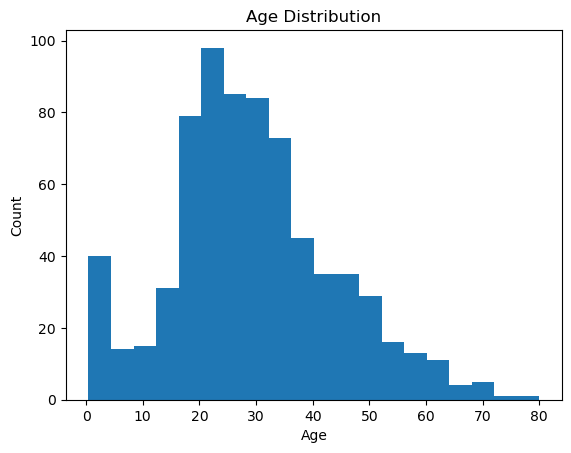

In [8]:
# Vizualize the age distribution
plt.hist(titanic_data['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

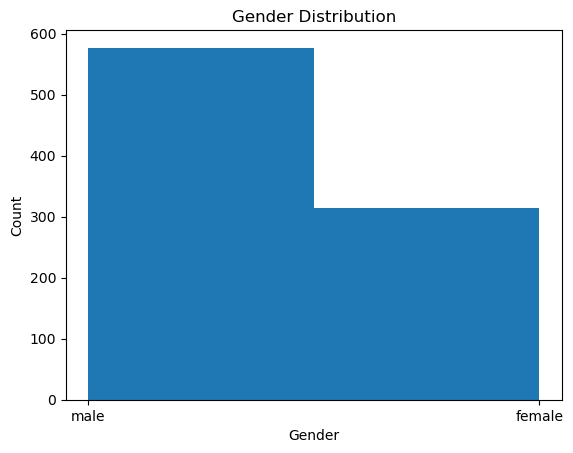

In [10]:
# Plot the gender distribution
plt.hist(titanic_data['Sex'], bins=2)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

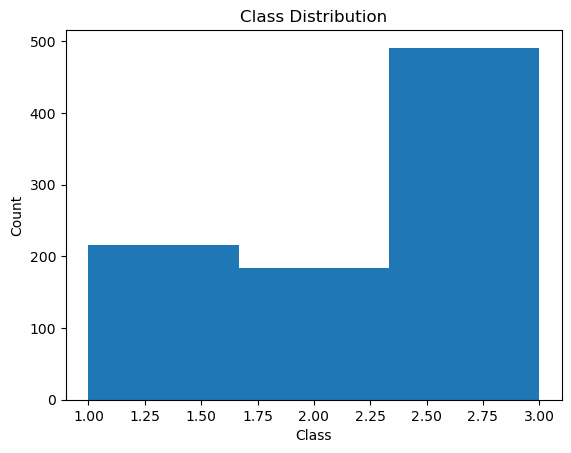

In [13]:
# Plot the class distribution
plt.hist(titanic_data['Pclass'], bins=3)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

## Preprocessing

In [15]:
# Fill in the missing values in the Age column
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

# Fill in the missing values in the Embarked column
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

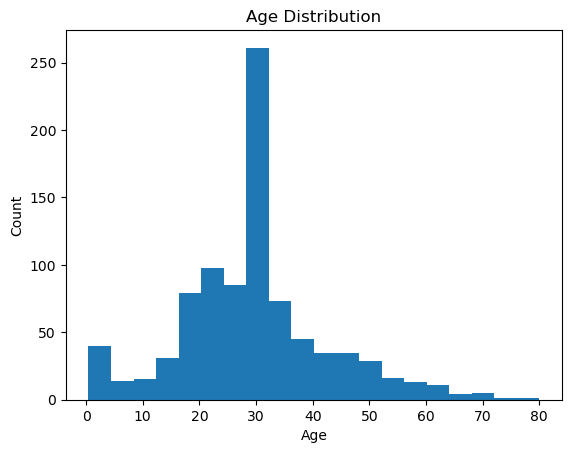

In [16]:
# Again, plot age distribution
plt.hist(titanic_data['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

##### Notice how the age distribution changed

## Train the Model

In [29]:
# Convert integer values in 'Survived' column to boolean values
titanic_data['Survived'] = titanic_data['Survived'].astype(bool)

# Lets double check the data type
print(titanic_data['Survived'].dtype)


bool


In [35]:
# Feature selection
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

X = titanic_data[features]
y = titanic_data['Survived']

# Convert categorical variables to indicator variables
X = pd.get_dummies(X, drop_first = True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [38]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on test set
y_pred = rf_classifier.predict(X_test)


In [39]:
# Evaluate the Model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.8044692737430168
Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.86      0.84       105
        True       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
 [[90 15]
 [20 54]]


## `Vizualization+`

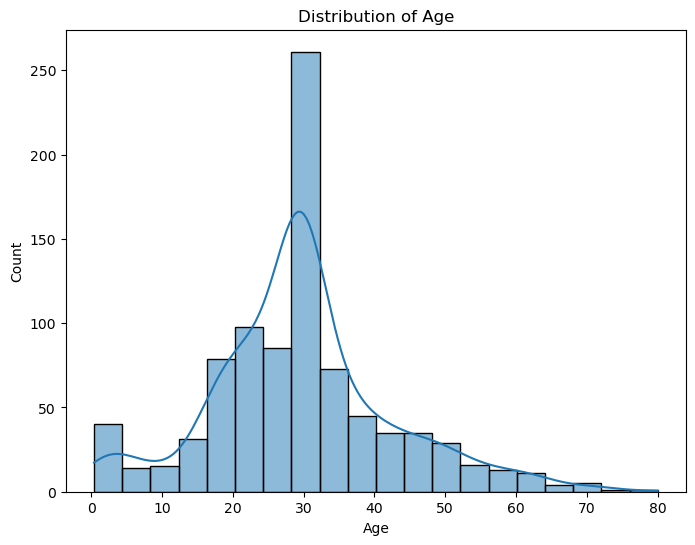

In [41]:
import seaborn as sns

# Histogram of Age
plt.figure(figsize = (8, 6))
sns.histplot(titanic_data['Age'], bins = 20, kde = True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


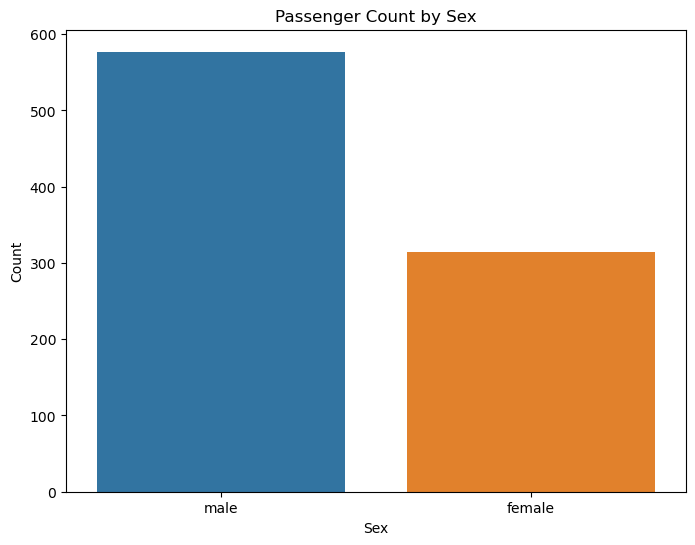

In [42]:
# Bar plot of Sex
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Sex', data = titanic_data)
plt.title('Passenger Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

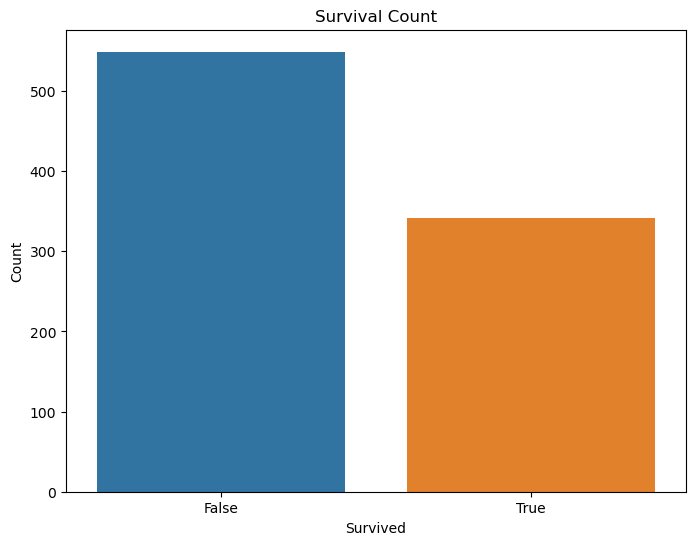

In [44]:
# Bar plot of survival status
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Survived', data = titanic_data)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

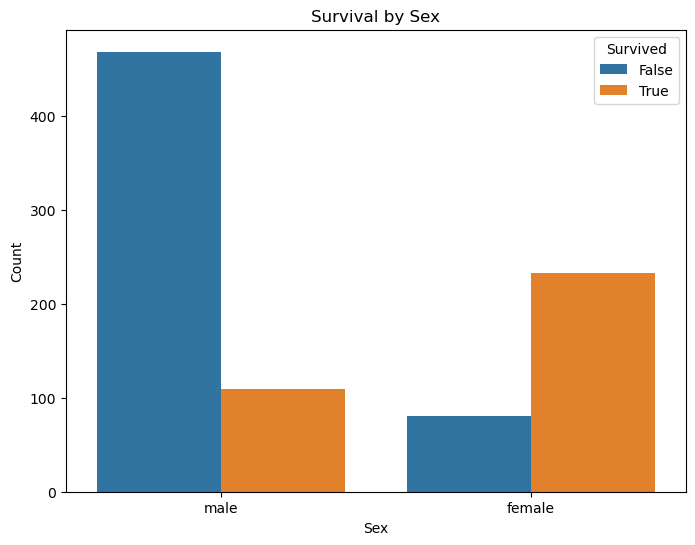

In [46]:
# Bar plot of survival by Sex
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Sex', hue = 'Survived', data = titanic_data)
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title = 'Survived', loc = 'upper right')
plt.show()

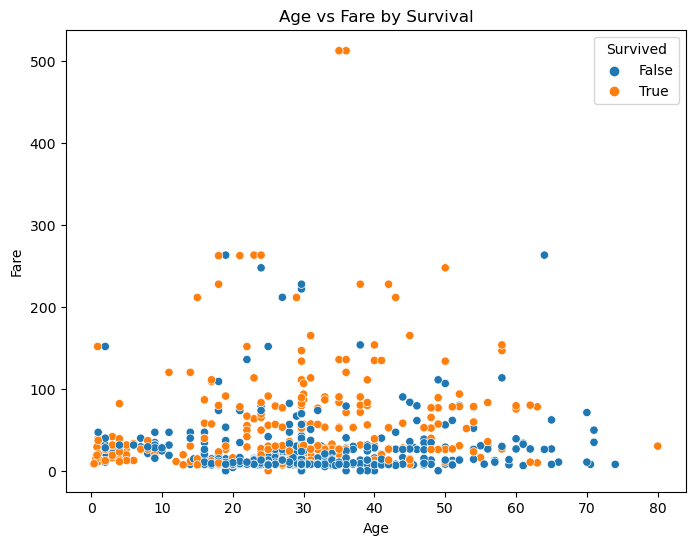

In [48]:
# Scatter plot of Age v. Fare, colored by Survived
plt.figure(figsize = (8, 6))
sns.scatterplot(x = 'Age', y = 'Fare', hue = 'Survived', data = titanic_data)
plt.title('Age vs Fare by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


c:\Users\cesth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

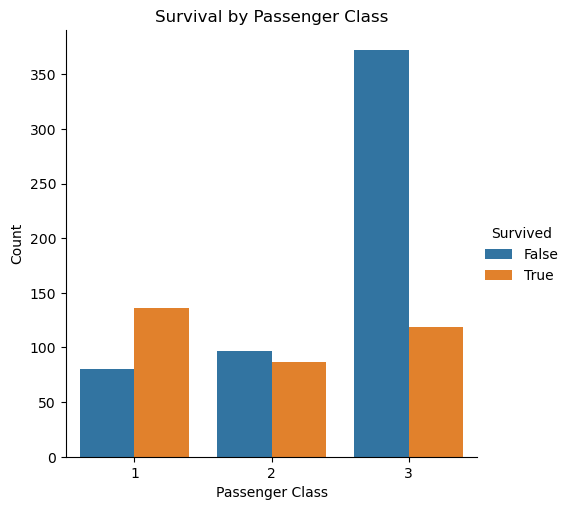

In [49]:
# Factor plot of survival by Pclass
plt.figure(figsize = (8, 6))
sns.catplot(x = 'Pclass', hue = 'Survived', kind = 'count', data = titanic_data)
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

c:\Users\cesth\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


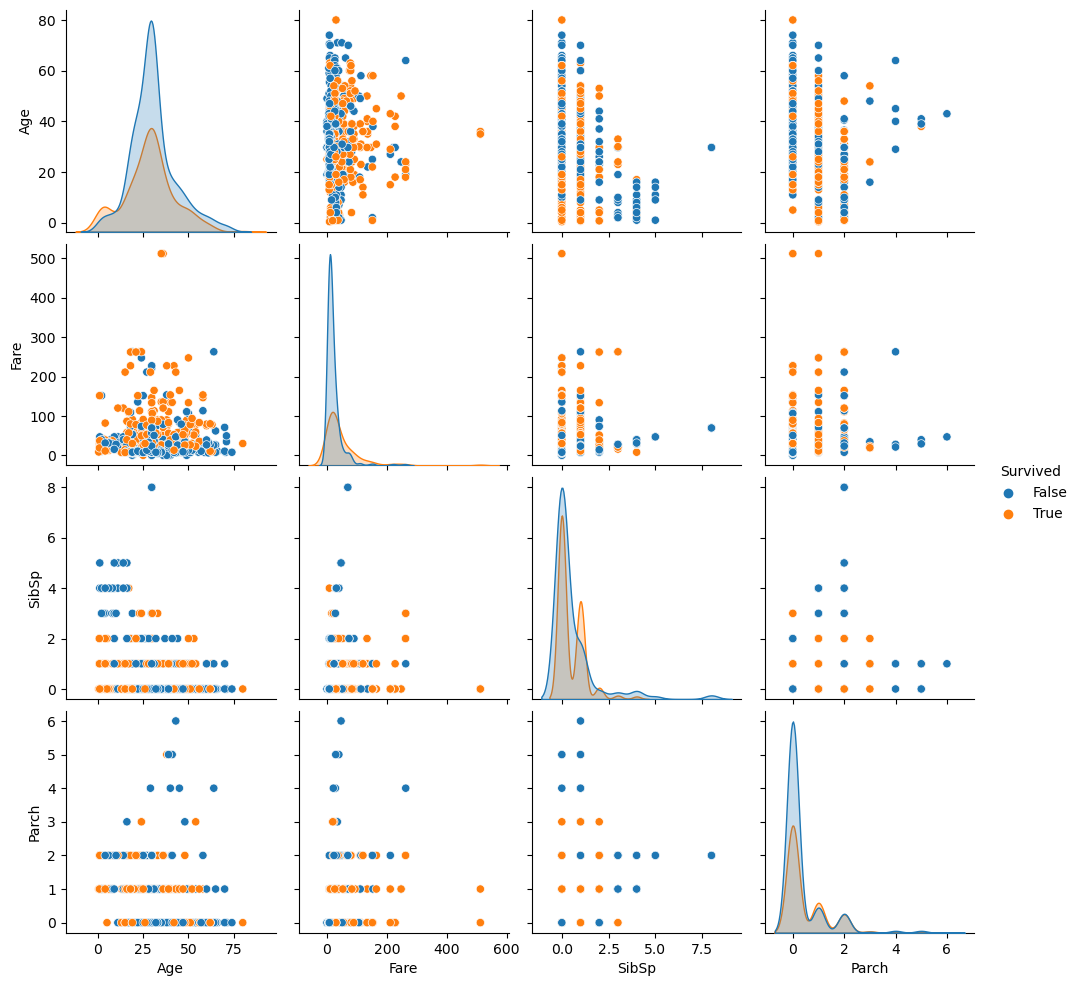

In [50]:
# Pair plot of numerical features
sns.pairplot(titanic_data[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']], hue = 'Survived', diag_kind = 'kde')
plt.show()